<a href="https://colab.research.google.com/github/EnFiore/ai-machine-learning-modelli-e-algoritmi/blob/main/1%20-%20L'algoritmo%20Gradient%20Descent/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L'algoritmo Gradient Descent

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from time import time
from sklearn.utils import shuffle

In [ ]:
plt.rcParams["figure.figsize"] = (16,10)
#sns.set_theme()

In [ ]:
RANDOM_SEED = 0

## Regressione

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X, y = make_regression(n_samples=100, n_features=50, bias=5.0, noise=20.0,random_state=RANDOM_SEED)
#plt.scatter(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
model = SGDRegressor(max_iter=1000,
                     penalty="elasticnet",
                     alpha=0.01,
                     l1_ratio=0.9,
                     learning_rate="adaptive",
                     #eta0=0.001
                     )

model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, l1_ratio=0.9, learning_rate='adaptive',
             penalty='elasticnet')

In [ ]:
def evaluate(model, data):
    x, y = data
    y_pred = model.predict(x)
    print(f"MSE = {mean_squared_error(y, y_pred)}")
    print(f"R2 = {r2_score(y, y_pred)}")

In [ ]:
evaluate(model, (X_train, y_train))

MSE = 50.64576647114784
R2 = 0.9975392218313435


In [ ]:
evaluate(model, (X_test, y_test))

MSE = 624.3732100266326
R2 = 0.958510784513408


## Classificazione

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
X, y = make_classification(n_samples=100, n_features=30, n_informative=30, n_redundant=0, n_repeated=0, n_classes=2, random_state=RANDOM_SEED)

In [ ]:
#funzione per valutare il modello
def evaluate(model, data):
    x, y = data
    y_pred = model.predict(x)
    print(f"ACCURACY = {accuracy_score(y, y_pred)}")
    print(f"LOG LOSS = {log_loss(y, y_pred)}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
#creazione modello di classificazione
model = SGDClassifier(max_iter=1000,
                     penalty="elasticnet",
                     alpha=0.1,
                     l1_ratio=0.9,
                     learning_rate="adaptive", #di default è usato 'invscaling' riduce il learning rate con l'aumetare delle epoche
                     eta0=0.01, #valore iniziale del learning rate
                     random_state=RANDOM_SEED
                     )

model.fit(X_train, y_train)

SGDClassifier(alpha=0.1, eta0=0.01, l1_ratio=0.9, learning_rate='adaptive',
              penalty='elasticnet', random_state=0)

In [ ]:
model = SGDClassifier(random_state=RANDOM_SEED)
model.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [ ]:
evaluate(model, (X_train, y_train))

ACCURACY = 0.8857142857142857
LOG LOSS = 4.119274673041961


In [ ]:
evaluate(model, (X_test, y_test))

ACCURACY = 0.7666666666666667
LOG LOSS = 8.410185790794003


### Stochastic Gradient Descent

In [ ]:
X, y = make_classification(n_samples=100, n_features=30, n_informative=30, n_redundant=0, n_repeated=0, n_classes=2, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
epochs =5

n_batches=X_train.shape[0] #imposto il numero di batch = al numero di osservazioni
batch_size = X_train.shape[0]/n_batches #numero di batch = osservazioni allora diventa un mini batch descent

classes = np.unique(y_train)

sgd = SGDClassifier(loss="log_loss")
sgd_losses = []

tick = time()

for epoch in range(epochs):
        X_shuffled, y_shuffled = shuffle(X_train, y_train) #al termine di ogni epoca si mescola il dataset
        for batch in range(n_batches): #si cicla sui batch
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            y_batch = y_shuffled[batch_start:batch_end]

            sgd.partial_fit(X_batch, y_batch, classes=classes) #si passano le classi per essere sicuri che vangano analizzati tutti i valor
            loss = log_loss(y_train, sgd.predict_proba(X_train),labels=classes)
            sgd_losses.append(loss)
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

print(f"Addestramento completato in {time()-tick:.2f} secondi")

Loss all'epoca 1 = 10.5340
Loss all'epoca 2 = 8.2694
Loss all'epoca 3 = 8.1459
Loss all'epoca 4 = 6.0039
Loss all'epoca 5 = 5.9761
Addestramento completato in 0.51 secondi


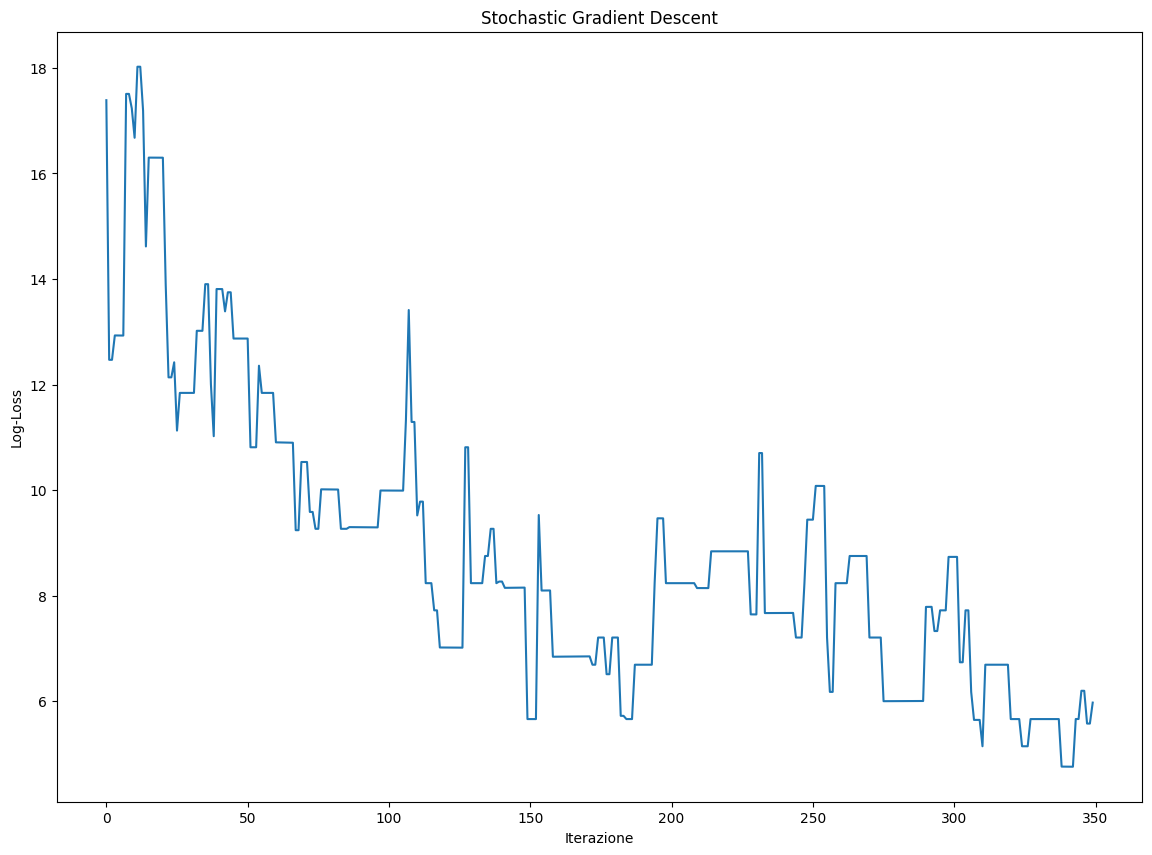

In [ ]:
#visualizazione gafica della log loss
plt.figure(figsize=(14,10))
plt.title("Stochastic Gradient Descent")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(sgd_losses)

In [ ]:
from sklearn.metrics import log_loss

class LogisticRegression:

    def __init__(self, learning_rate=.05, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def activation(self,z):
        return 1. / (1. + np.exp(-z))

    def net_input(self, X):
        return np.dot(self.weights, X.T)+self.bias

    def predict_proba(self, X):
        z = self.net_input(X)
        a = self.activation(z)
        return a

    def predict(self, X):
        a = self.predict_proba(X)
        y_pred = (a>=0.5).astype(int)
        return y_pred

    def derivate_costfunc(self, X, y):
        z = self.net_input(X)
        a = self.activation(z)
        errors = (y - a)
        dw = X.T.dot(errors)
        db = errors.sum()
        return (dw,db)

    def fit(self, X, y):

        self.weights = np.zeros(X.shape[1])
        self.training_history = []
        self.bias = 0

        for _ in range(self.n_iter):
            dw, db = self.derivate_costfunc(X, y)
            self.weights += self.learning_rate*dw
            self.bias += self.learning_rate*db
            loss = log_loss(y, self.predict_proba(X))
            self.training_history.append(loss)

    def evaluate(self, X, y):
      y_proba = self.predict_proba(X)
      print(len(y))
      return log_loss(y, y_proba)

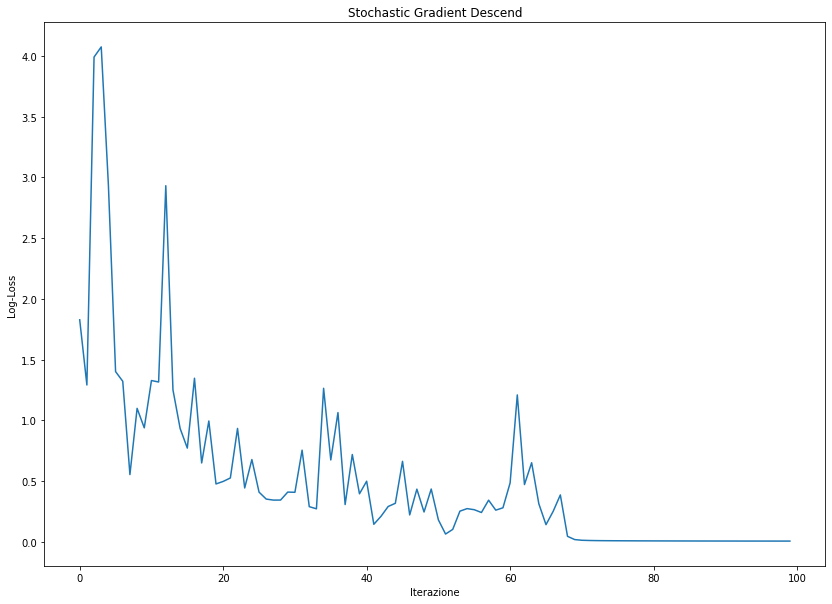

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

plt.figure(figsize=(14,10))
plt.title("Stochastic Gradient Descent")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(lr.training_history)